# Lab3 on Digital Image Processing on the topic "Image Classification using Convolution Neural Networks"
# Лабораторная работа №3 по Цифровой Обработке Изображений на тему "Классификация изображений с использованием Свёрточных Нейронных Сетей"
### Tasks:
1. In Python 3.x, create a project and include the scikit-learn, tensorflow or pytorch library.
2. Supplement sets of pictures by option (options below). At least 20 pictures for each class (if the classification is unsatisfactory, add more). Pictures should be deliberately similar.
3. Choose an implementation and train a convolutional neural network (CNN) for classification according to the variant.
4. Conduct an experiment on image recognition with visualization of the results.
5. Conduct an information search on the Internet. Try several options for CNN architectures. Choose the best architecture from at least two. Build a graph of errors of the first and second kind based on the recognition results.
6. Add a comment to each line of code!
7. Send the program and prepared images to the teacher.
8. Prepare and send a report (title page, task, theoretical part, architectures of convolutional neural networks, sample images from a sample, program structure diagram, print screens of the main steps of the program, conclusion and conclusions, listing of the program with comments, bibliography).

### Задачи:
1. На языке Python 3.x создать проект и подключить библиотеку scikit-learn, tensorflow или pytorch.
2. Дополнить наборы картинок по варианту (варианты снизу). Минимум 20 картинок для каждого класса (при неудовлетворительной классификации добавить ещё).Картинки намеренно должны быть схожими.
3. Выбрать реализацию и обучить сверточную нейронную сеть (CNN) для классификации в соответствии свариантом.
4. Провести эксперимент по распознаванию изображений с визуализацией результатов.
5. Провести информационный поиск в Интернете. Попробовать несколько вариантов архитектур CNN. Выбрать лучшую архитектуру как минимум из двух. Построить график ошибок первого и второго рода по результатам распознавания.
6. Дать комментарий каждой строчке кода!
7. Прислать программу и подготовленныеизображения преподавателю.
8. Подготовить и прислать отчет (титульный лист, задание, теоретическая часть, архитектуры сверточных нейронных сетей, примерыизображений из выборки,  диаграмма  структуры  программы,  принтскрины  основных шагов работы программы, заключение и выводы, листинг программы с комментариями, список использованной литературы).

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

TRAIN_PATH = os.path.join(os.getcwd(), 'dataset\\train')
TEST_PATH = os.path.join(os.getcwd(), 'dataset\\test')

# Dataset
# Набор данных
The dataset consists of images with a resolution of 170x170 pixels and is divided into two parts: train and test. The train and test parts are divided into two classes: Chihuahuas and muffins.

Набор данных состоит из изображений разрешением 170x170 пикселей и разделён на две части: обучающую и тестовую. Обучающая и тестовая части разделены на два класса: собаки породы Чихуахуа и маффины.

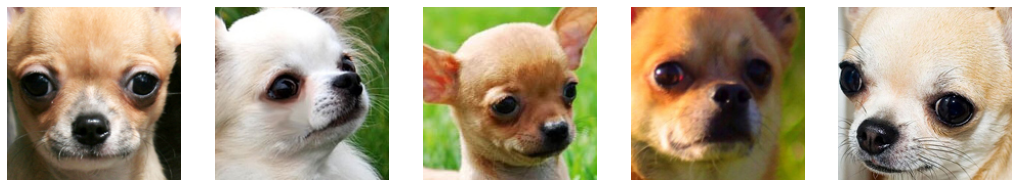

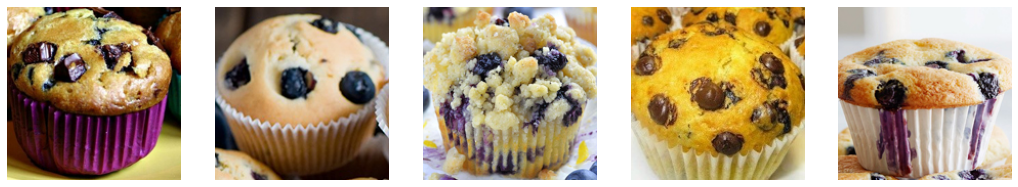

In [2]:
def show_images(path, shape, figsize, *, suptitle=None):
    n_rows, n_columns = shape
    
    file_names = os.listdir(path)
    
    rng = np.random.default_rng()
    random_file_names = rng.choice(file_names, size=(n_rows * n_columns), replace=False)
    
    fig, axes = plt.subplots(*shape, figsize=figsize)
    axes = axes.flatten()
    for ax, random_file_name in zip(axes, random_file_names):
        random_image = plt.imread(os.path.join(path, random_file_name))
        ax.imshow(random_image)
        ax.set_axis_off()
    fig.suptitle(suptitle, fontsize=20)
    plt.show(fig)
    
    
show_images(os.path.join(TRAIN_PATH, 'Chihuahua'), (1, 5), (18, 4))
show_images(os.path.join(TRAIN_PATH, 'Muffin'), (1, 5), (18, 4))

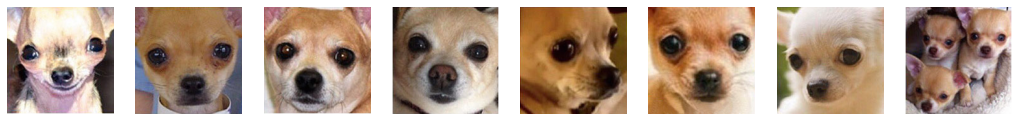

In [3]:
show_images(os.path.join(TEST_PATH, 'Chihuahua'), (1, 8), (18, 4))

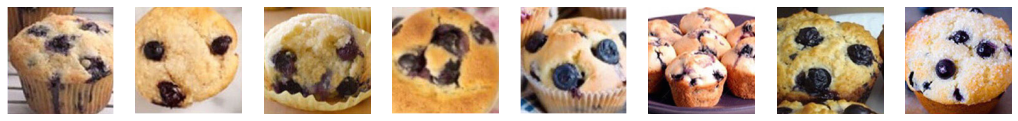

In [4]:
show_images(os.path.join(TEST_PATH, 'Muffin'), (1, 8), (18, 4))

# Data Augmentations

Давайте взглянем на примеры аугментации данных. Какие они бывают.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def show_augmentaion(augmentaion, **kwargs):
    path = os.path.join(os.getcwd(), 'Dataset\\augmentations\\{}'.format(augmentaion))
    
    # удаляем содержимое папки, если оно есть
    file_names = os.listdir(path)
    if file_names:
        for file_name in file_names:
            os.remove(os.path.join(path, file_name))
    
    augmentaion_generator = ImageDataGenerator(**kwargs)
    augmentaion_datagen = augmentaion_generator.flow_from_directory(
        TRAIN_PATH,
        target_size=(170, 170),
        save_to_dir=path,
        save_format='png',
    )
    next(augmentaion_datagen)
    show_images(path, (1, 5), (18, 4), suptitle=augmentaion)

Found 109 images belonging to 2 classes.


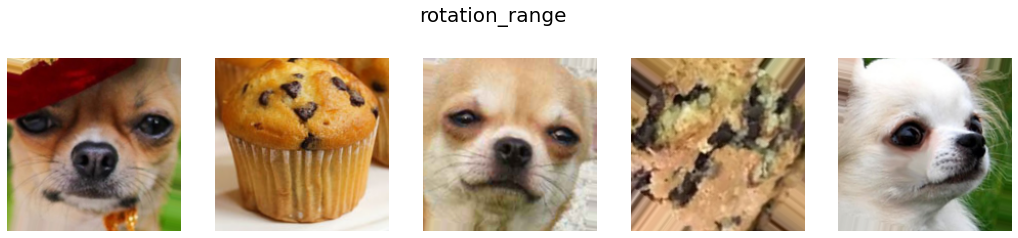

In [6]:
show_augmentaion('rotation_range', rotation_range=180)

Found 109 images belonging to 2 classes.


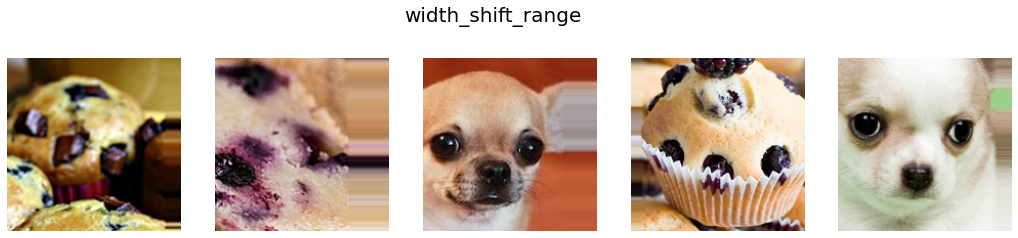

In [7]:
show_augmentaion('width_shift_range', width_shift_range=50)

Found 109 images belonging to 2 classes.


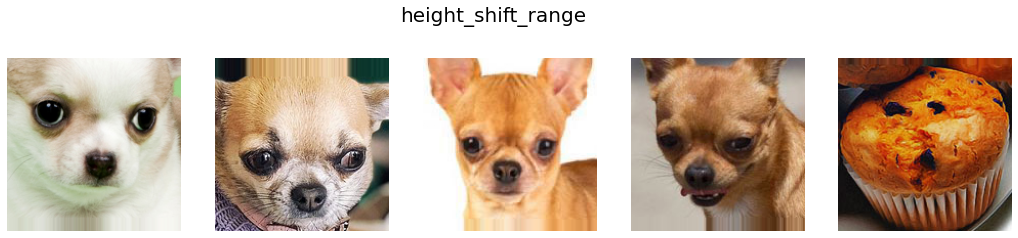

In [8]:
show_augmentaion('height_shift_range', height_shift_range=50)

Found 109 images belonging to 2 classes.


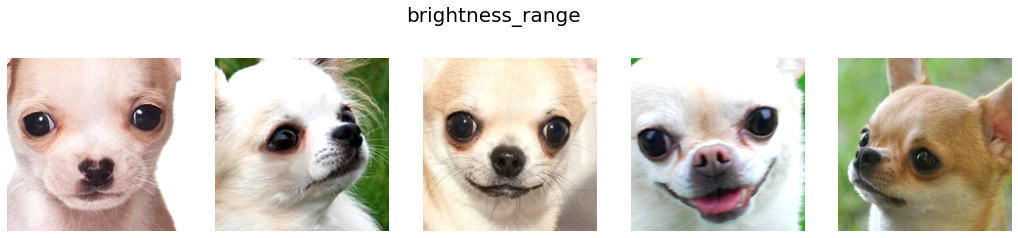

In [9]:
show_augmentaion('brightness_range', brightness_range=(1., 1.2))

Found 109 images belonging to 2 classes.


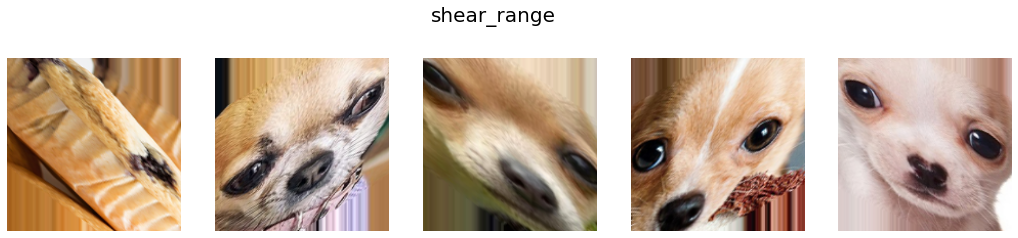

In [10]:
show_augmentaion('shear_range', shear_range=50.0)

Found 109 images belonging to 2 classes.


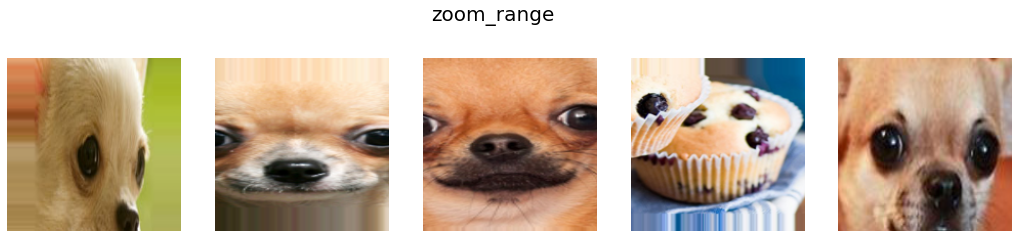

In [11]:
show_augmentaion('zoom_range', zoom_range=0.5)

Found 109 images belonging to 2 classes.


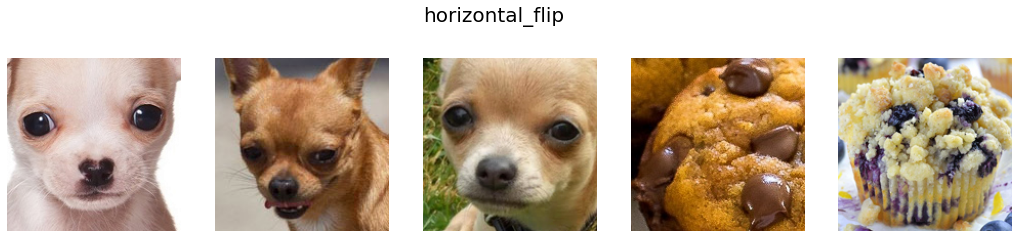

In [12]:
show_augmentaion('horizontal_flip', horizontal_flip=True)

Found 109 images belonging to 2 classes.


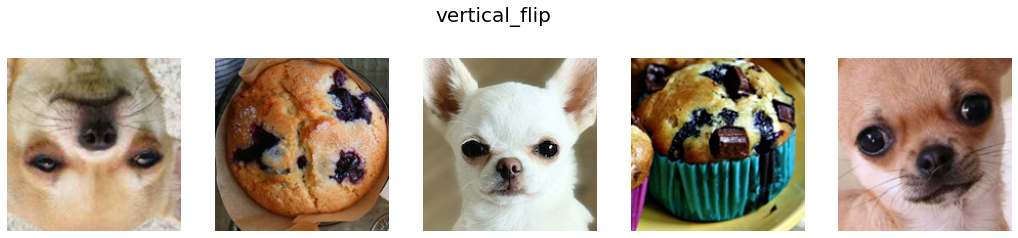

In [13]:
show_augmentaion('vertical_flip', vertical_flip=True)

Found 109 images belonging to 2 classes.


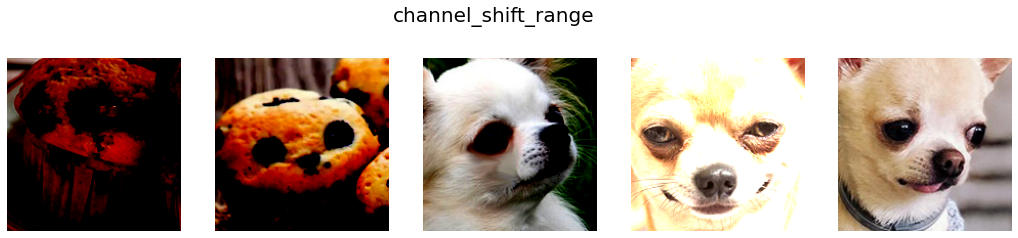

In [14]:
show_augmentaion('channel_shift_range', channel_shift_range=200.)

Found 109 images belonging to 2 classes.


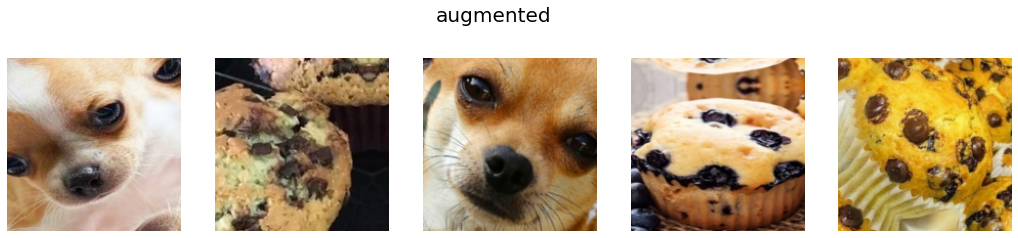

In [15]:
AUGMENTATION_SETTINGS = dict(
    rotation_range=45,
    width_shift_range=20,
    height_shift_range=20,
    zoom_range=0.2,
    fill_mode='reflect',
    horizontal_flip=True
)

show_augmentaion('augmented', **AUGMENTATION_SETTINGS)

In [16]:
train_val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    **AUGMENTATION_SETTINGS
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [17]:
train_generator = train_val_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(170, 170),
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

Found 88 images belonging to 2 classes.


In [18]:
val_generator = train_val_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(170, 170),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 21 images belonging to 2 classes.


In [19]:
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(170, 170),
    class_mode='categorical',
    batch_size=1,
)

Found 16 images belonging to 2 classes.


In [20]:
IMAGE_SIZE = (170, 170)
INPUT_SHAPE = (170, 170, 3)
KERNEL_SIZE = (3, 3)
POOL_SIZE = (2, 2)
EPOCHS = 250


model32 = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE),
        tf.keras.layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, padding='same', activation='relu', use_bias=True),
        tf.keras.layers.MaxPooling2D(pool_size=POOL_SIZE),
        tf.keras.layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, padding='same', activation='relu', use_bias=True),
        tf.keras.layers.MaxPooling2D(pool_size=POOL_SIZE),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax'),
    ]
)

model64 = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE),
        tf.keras.layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, padding='same', activation='relu', use_bias=True),
        tf.keras.layers.MaxPooling2D(pool_size=POOL_SIZE),
        tf.keras.layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, padding='same', activation='relu', use_bias=True),
        tf.keras.layers.MaxPooling2D(pool_size=POOL_SIZE),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax'),
    ]
)

In [21]:
model32.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 170, 170, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 56448)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1806368   
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [22]:
model64.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 170, 170, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 85, 85, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 112896)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                7225408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [23]:
model32.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model64.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
history32 = model32.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/250
3/3 [==============================] - 4s 814ms/step - loss: 1.2650 - accuracy: 0.5909 - val_loss: 0.7037 - val_accuracy: 0.4286
Epoch 2/250
3/3 [==============================] - 2s 656ms/step - loss: 1.8161 - accuracy: 0.5795 - val_loss: 0.6646 - val_accuracy: 0.9048
Epoch 3/250
3/3 [==============================] - 2s 636ms/step - loss: 0.7300 - accuracy: 0.5455 - val_loss: 0.6870 - val_accuracy: 0.6190
Epoch 4/250
3/3 [==============================] - 2s 664ms/step - loss: 0.7302 - accuracy: 0.4091 - val_loss: 0.6824 - val_accuracy: 0.4286
Epoch 5/250
3/3 [==============================] - 2s 621ms/step - loss: 0.6809 - accuracy: 0.5455 - val_loss: 0.6896 - val_accuracy: 0.9524
Epoch 6/250
3/3 [==============================] - 2s 738ms/step - loss: 0.6871 - accuracy: 0.5909 - val_loss: 0.6858 - val_accuracy: 0.8095
Epoch 7/250
3/3 [==============================] - 2s 625ms/step - loss: 0.6714 - accuracy: 0.6250 - val_loss: 0.6378 - val_accuracy: 0.4762
Epoch 8/250
3

Epoch 59/250
3/3 [==============================] - 2s 659ms/step - loss: 0.5753 - accuracy: 0.7273 - val_loss: 0.5188 - val_accuracy: 0.7619
Epoch 60/250
3/3 [==============================] - 2s 723ms/step - loss: 0.5382 - accuracy: 0.7386 - val_loss: 0.4409 - val_accuracy: 0.9048
Epoch 61/250
3/3 [==============================] - 2s 780ms/step - loss: 0.5771 - accuracy: 0.7159 - val_loss: 0.4177 - val_accuracy: 0.8571
Epoch 62/250
3/3 [==============================] - 2s 649ms/step - loss: 0.3916 - accuracy: 0.8977 - val_loss: 0.3311 - val_accuracy: 0.9524
Epoch 63/250
3/3 [==============================] - 2s 661ms/step - loss: 0.3930 - accuracy: 0.8523 - val_loss: 0.2991 - val_accuracy: 1.0000
Epoch 64/250
3/3 [==============================] - 2s 845ms/step - loss: 0.3337 - accuracy: 0.9545 - val_loss: 0.3545 - val_accuracy: 0.9524
Epoch 65/250
3/3 [==============================] - 2s 700ms/step - loss: 0.3624 - accuracy: 0.8864 - val_loss: 0.3175 - val_accuracy: 0.9524
Epoch 

3/3 [==============================] - 2s 620ms/step - loss: 0.1721 - accuracy: 0.9659 - val_loss: 0.1446 - val_accuracy: 0.9524
Epoch 174/250
3/3 [==============================] - 2s 645ms/step - loss: 0.1961 - accuracy: 0.9432 - val_loss: 0.1244 - val_accuracy: 1.0000
Epoch 175/250
3/3 [==============================] - 2s 657ms/step - loss: 0.2563 - accuracy: 0.9205 - val_loss: 0.1086 - val_accuracy: 1.0000
Epoch 176/250
3/3 [==============================] - 2s 640ms/step - loss: 0.2957 - accuracy: 0.8977 - val_loss: 0.1283 - val_accuracy: 1.0000
Epoch 177/250
3/3 [==============================] - 2s 630ms/step - loss: 0.2510 - accuracy: 0.8864 - val_loss: 0.1961 - val_accuracy: 0.9048
Epoch 178/250
3/3 [==============================] - 2s 734ms/step - loss: 0.3174 - accuracy: 0.8864 - val_loss: 0.1999 - val_accuracy: 0.9524
Epoch 179/250
3/3 [==============================] - 2s 618ms/step - loss: 0.2952 - accuracy: 0.8977 - val_loss: 0.1843 - val_accuracy: 0.9048
Epoch 180/250

In [25]:
history64 = model64.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/250
3/3 [==============================] - 5s 2s/step - loss: 3.6798 - accuracy: 0.4886 - val_loss: 1.0773 - val_accuracy: 0.4286
Epoch 2/250
3/3 [==============================] - 4s 1s/step - loss: 1.1228 - accuracy: 0.4886 - val_loss: 0.6734 - val_accuracy: 0.5714
Epoch 3/250
3/3 [==============================] - 4s 1s/step - loss: 0.6974 - accuracy: 0.5795 - val_loss: 0.6737 - val_accuracy: 0.6667
Epoch 4/250
3/3 [==============================] - 4s 1s/step - loss: 0.6965 - accuracy: 0.5000 - val_loss: 0.6400 - val_accuracy: 0.7143
Epoch 5/250
3/3 [==============================] - 4s 2s/step - loss: 0.6542 - accuracy: 0.5682 - val_loss: 0.5887 - val_accuracy: 0.8571
Epoch 6/250
3/3 [==============================] - 4s 1s/step - loss: 0.6416 - accuracy: 0.6136 - val_loss: 0.6053 - val_accuracy: 0.7143
Epoch 7/250
3/3 [==============================] - 4s 1s/step - loss: 0.6541 - accuracy: 0.6591 - val_loss: 0.5799 - val_accuracy: 0.7143
Epoch 8/250
3/3 [=================

3/3 [==============================] - 4s 1s/step - loss: 0.1219 - accuracy: 0.9432 - val_loss: 0.1605 - val_accuracy: 0.9048
Epoch 61/250
3/3 [==============================] - 4s 1s/step - loss: 0.2378 - accuracy: 0.9091 - val_loss: 0.1663 - val_accuracy: 0.9524
Epoch 62/250
3/3 [==============================] - 4s 1s/step - loss: 0.1339 - accuracy: 0.9545 - val_loss: 0.1383 - val_accuracy: 0.9524
Epoch 63/250
3/3 [==============================] - 4s 1s/step - loss: 0.2072 - accuracy: 0.9205 - val_loss: 0.1619 - val_accuracy: 0.9048
Epoch 64/250
3/3 [==============================] - 4s 1s/step - loss: 0.1204 - accuracy: 0.9659 - val_loss: 0.2000 - val_accuracy: 0.9048
Epoch 65/250
3/3 [==============================] - 4s 1s/step - loss: 0.2174 - accuracy: 0.8750 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 66/250
3/3 [==============================] - 4s 1s/step - loss: 0.1286 - accuracy: 0.9545 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 67/250
3/3 [======================

Epoch 119/250
3/3 [==============================] - 4s 1s/step - loss: 0.0992 - accuracy: 0.9545 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 120/250
3/3 [==============================] - 4s 1s/step - loss: 0.0986 - accuracy: 0.9773 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 121/250
3/3 [==============================] - 4s 1s/step - loss: 0.0764 - accuracy: 0.9545 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 122/250
3/3 [==============================] - 4s 1s/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 123/250
3/3 [==============================] - 4s 1s/step - loss: 0.0546 - accuracy: 0.9659 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 124/250
3/3 [==============================] - 4s 1s/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 125/250
3/3 [==============================] - 4s 1s/step - loss: 0.0566 - accuracy: 0.9659 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 126/250
3/3 [=

3/3 [==============================] - 4s 1s/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 1.0000
Epoch 236/250
3/3 [==============================] - 4s 1s/step - loss: 0.0805 - accuracy: 0.9773 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 237/250
3/3 [==============================] - 5s 1s/step - loss: 0.0341 - accuracy: 0.9886 - val_loss: 0.1395 - val_accuracy: 0.9524
Epoch 238/250
3/3 [==============================] - 4s 2s/step - loss: 0.0464 - accuracy: 0.9773 - val_loss: 0.1858 - val_accuracy: 0.8571
Epoch 239/250
3/3 [==============================] - 4s 1s/step - loss: 0.0749 - accuracy: 0.9659 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 240/250
3/3 [==============================] - 5s 2s/step - loss: 0.0513 - accuracy: 0.9773 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 241/250
3/3 [==============================] - 5s 2s/step - loss: 0.0397 - accuracy: 0.9773 - val_loss: 0.1639 - val_accuracy: 0.8571
Epoch 242/250
3/3 [===============

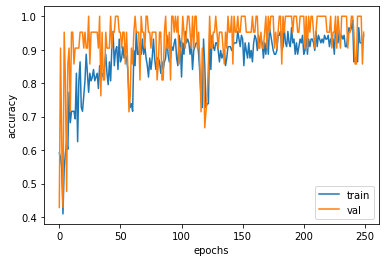

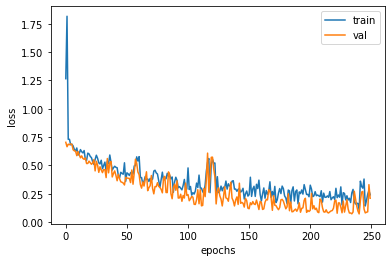

In [26]:
def plot_history(history, mode):
    ax = plt.subplot()
    ax.plot(history.history['%s' % mode])
    ax.plot(history.history['val_%s' % mode])
    
    ax.set_xlabel('epochs')
    ax.set_ylabel('%s' % mode)
    
    ax.legend(['train', 'val'])
    
    plt.show()


plot_history(history32, 'accuracy')
plot_history(history32, 'loss')

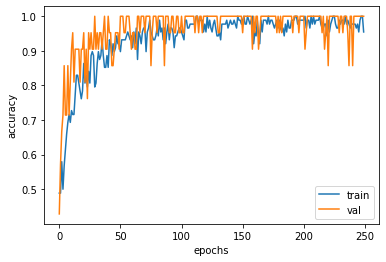

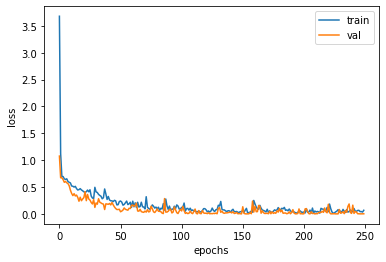

In [27]:
plot_history(history64, 'accuracy')
plot_history(history64, 'loss')

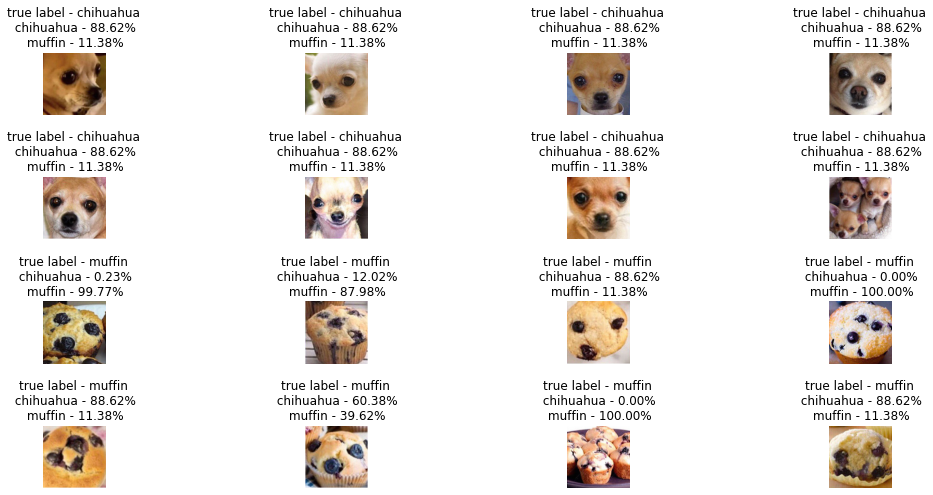

In [111]:
TEST_CHIHUAHUA = os.path.join(os.getcwd(), 'dataset\\test\\Chihuahua')
TEST_MUFFIN = os.path.join(os.getcwd(), 'dataset\\test\\Muffin')

test_image_paths_chihuahua = [os.path.join(TEST_CHIHUAHUA, file_name) for file_name in os.listdir(TEST_CHIHUAHUA)]
test_image_paths_muffin = [os.path.join(TEST_MUFFIN, file_name) for file_name in os.listdir(TEST_MUFFIN)]

test_image_paths = test_image_paths_chihuahua + test_image_paths_muffin
true_labels = ['chihuahua'] * len(test_image_paths_chihuahua) + ['muffin'] * len(test_image_paths_muffin)


def load_image(path):
    raw = tf.io.read_file(path)
    image = tf.image.decode_jpeg(raw, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image[tf.newaxis]
    return image


def show_predictions(model, test_image_paths, true_labels):
    fig, axes = plt.subplots(4, 4, figsize=(18, 8))
    axes = axes.flatten()

    for ax, test_image_path, label in zip(axes, test_image_paths, true_labels):
        image = plt.imread(test_image_path)
        ax.imshow(image)
        ax.set_axis_off()

        image = load_image(test_image_path)
        predict = model.predict(image)

        ax.set_title('true label - {}\n chihuahua - {:2.2%}\n muffin - {:2.2%}'.format(label, predict[0][0], predict[0][1]))

    plt.subplots_adjust(hspace=1)
    plt.show()
    

show_predictions(model32, test_image_paths, true_labels)

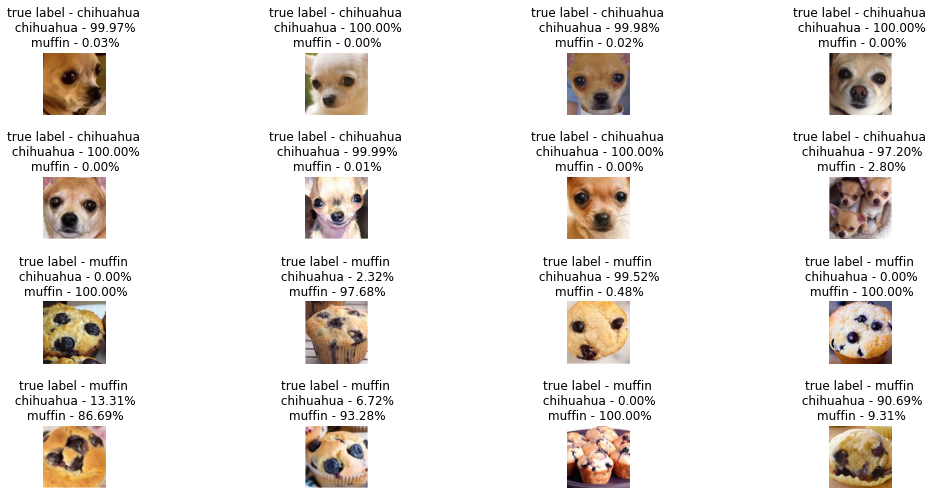

In [112]:
show_predictions(model64, test_image_paths, true_labels)

In [29]:
model32.evaluate(test_generator)

16/16 [==============================] - 0s 8ms/step - loss: 0.5710 - accuracy: 0.7500


[0.5709570646286011, 0.75]

In [30]:
model64.evaluate(test_generator)

16/16 [==============================] - 0s 17ms/step - loss: 0.5460 - accuracy: 0.8750


[0.5460179448127747, 0.875]